<a href="https://colab.research.google.com/github/Anybody99901/PRODIGY_DS_03/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Prodigy Infotech Internship – Task-3

Objective:
Build a **Decision Tree Classifier** to predict whether a client will subscribe to a bank term deposit based on their demographic and behavioral data.

Dataset: `bank-additional-full.csv`
- Contains marketing campaign data from a Portuguese bank.
- 20 input features + 1 output label (`y`).
- We'll exclude the `duration` column to avoid data leakage.

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Step 1: Load the Dataset

We will load the `bank-additional-full.csv` file and examine its structure.  
The data uses a semicolon `;` as a separator.

In [13]:

# Load the dataset
df = pd.read_csv("bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##  Step 2: Drop the `duration` Column

The `duration` column significantly affects the target but isn't available before the call is made — so we drop it to ensure realistic prediction.

In [14]:

df = df.drop(columns=['duration'])

## Step 3: Encode Categorical Columns

We convert categorical (string) features into numerical using `LabelEncoder` so that they can be used by the decision tree classifier.

In [15]:

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Step 4: Split into Features and Target

We separate:
- `X`: All input columns
- `y`: The target column (`y`)

In [16]:

X = df.drop(columns=['y'])
y = df['y']

## Step 5: Split Dataset

We split the dataset into:
- **Training Set** (80%)
- **Test Set** (20%)

This allows us to test model performance on unseen data.

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Step 6: Train the Decision Tree

We use the DecisionTreeClassifier with:
- **criterion = 'entropy'** to split based on information gain.

In [18]:

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

##  Step 7: Evaluate the Model

We check:
- Accuracy
- Confusion Matrix
- Classification Report (Precision, Recall, F1-Score)

In [19]:

y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📘 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.8970623937848993

📘 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.26      0.36       935

    accuracy                           0.90      8238
   macro avg       0.76      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238

📉 Confusion Matrix:
 [[7148  155]
 [ 693  242]]


## Step 8: Visualize the Decision Tree

This helps explain how the model makes decisions using rules from the features.

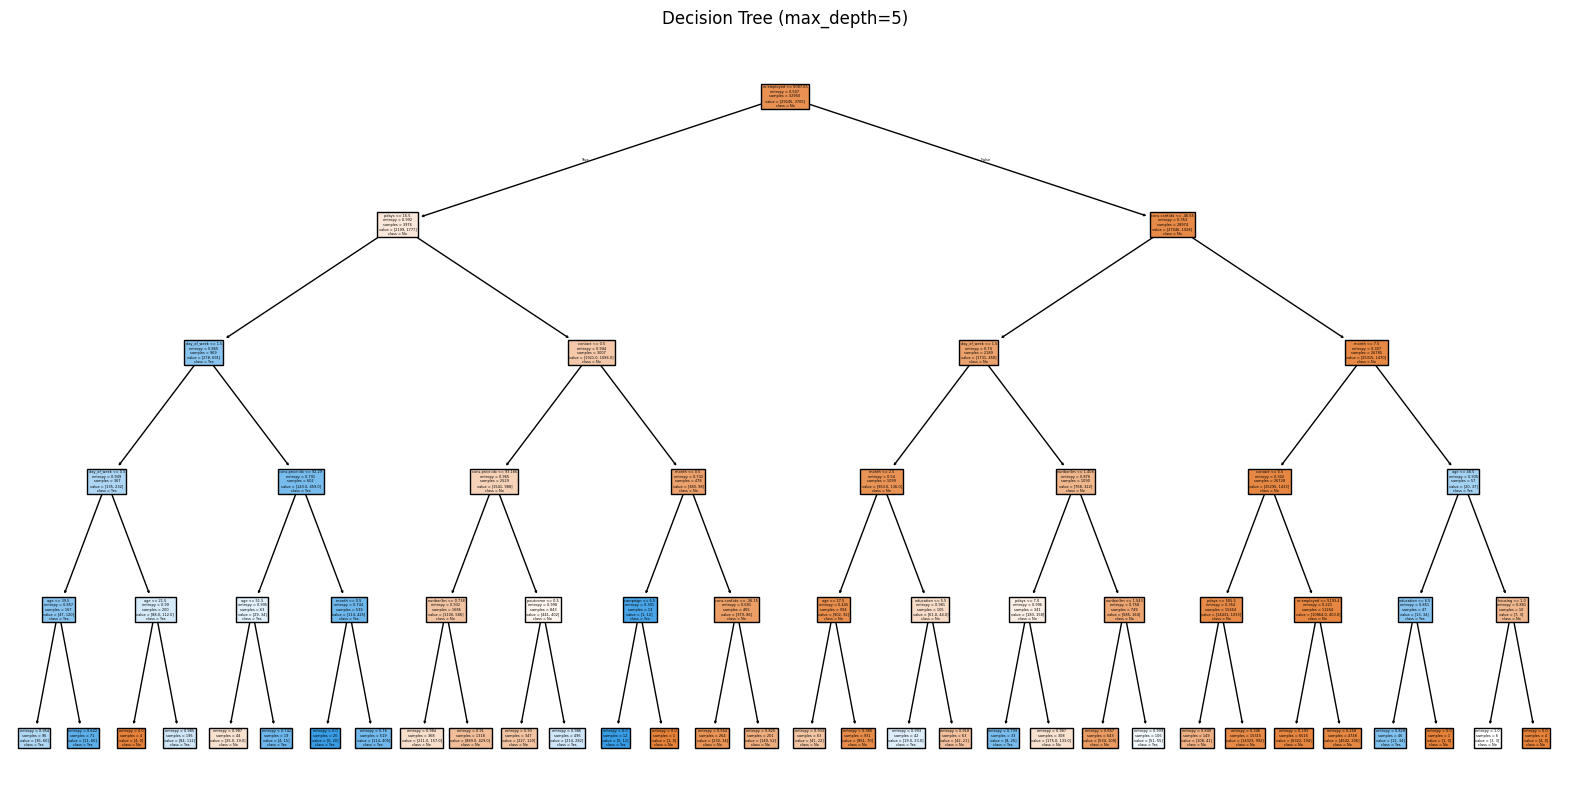

In [20]:

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (max_depth=5)")
plt.show()

##  Step 9: Feature Importance

We visualize which features had the biggest impact on decision-making.

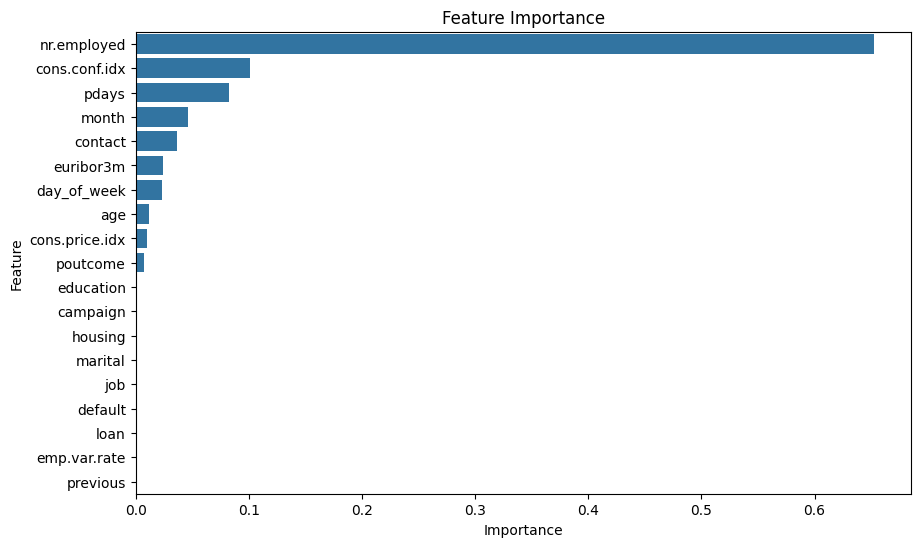

In [21]:

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()